In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# Loading the datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Data Set/Train',
    labels="inferred",
    label_mode="categorical", #for multi-class classification
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True
)

NotFoundError: Could not find directory /content/drive/MyDrive/Data Set/Train

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Data Set/Validation',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True
)

Found 2413 files belonging to 10 classes.


In [ ]:
# Number of fruit classes
classes = 10

In [ ]:
# Building the CNN model
cnn = tf.keras.models.Sequential()

In [ ]:
# Convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3])) #relu it activates negative values to zero
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
# Flattening and fully connected layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# Output layer for fruit classification
cnn.add(tf.keras.layers.Dense(units=classes, activation='softmax'))

In [ ]:
# Compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.build()

In [ ]:
# Model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
# Training the model
training_history = cnn.fit(x=training_set, validation_data = validation_set, epochs=50)

Epoch 1/50
327/327 [==============================] - 272s 825ms/step - loss: 0.0124 - accuracy: 0.9986 - val_loss: 1.4676 - val_accuracy: 0.9465
Epoch 2/50
327/327 [==============================] - 256s 778ms/step - loss: 0.0144 - accuracy: 0.9983 - val_loss: 1.3593 - val_accuracy: 0.9428
Epoch 3/50
327/327 [==============================] - 261s 794ms/step - loss: 0.0363 - accuracy: 0.9966 - val_loss: 0.9064 - val_accuracy: 0.9548
Epoch 4/50
327/327 [==============================] - 260s 790ms/step - loss: 0.0125 - accuracy: 0.9989 - val_loss: 1.4699 - val_accuracy: 0.9445
Epoch 5/50
327/327 [==============================] - 257s 783ms/step - loss: 0.0170 - accuracy: 0.9981 - val_loss: 0.5249 - val_accuracy: 0.9772
Epoch 6/50
327/327 [==============================] - 256s 777ms/step - loss: 0.0260 - accuracy: 0.9971 - val_loss: 1.5973 - val_accuracy: 0.9697
Epoch 7/50
327/327 [==============================] - 255s 773ms/step - loss: 0.1377 - accuracy: 0.9907 - val_loss: 2.6251 -

In [ ]:
# Evaluating the model
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

327/327 [==============================] - 93s 277ms/step - loss: 0.0097 - accuracy: 0.9995
Training accuracy: 0.9995208382606506


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

76/76 [==============================] - 20s 243ms/step - loss: 5.7140 - accuracy: 0.9470
Validation accuracy: 0.9469540119171143


In [ ]:
# Saving the model
cnn.save('classify.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Recording history in JSON
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
# Calculating accuracy on validation set
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1] * 100))

Validation set Accuracy: 94.69540119171143 %


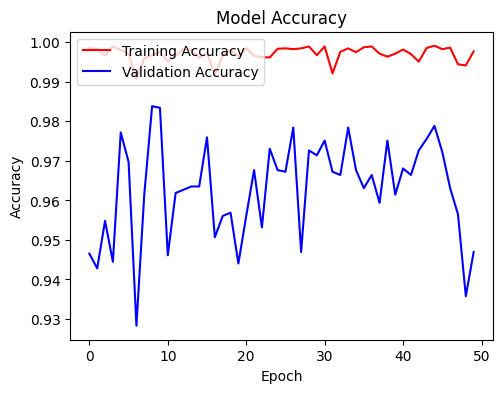

In [ ]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

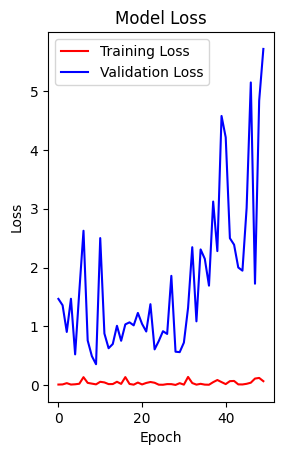

In [ ]:
# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss', color='red')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [ ]:
# Display the plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Evaluating on test set
test_loss, test_acc = cnn.evaluate(validation_set)
print('Test accuracy:', test_acc)

76/76 [==============================] - 28s 316ms/step - loss: 5.7140 - accuracy: 0.9470
Test accuracy: 0.9469540119171143


In [ ]:
# Loading the trained model
cnn = tf.keras.models.load_model('classify.h5')

1/1 [==============================] - 0s 117ms/step


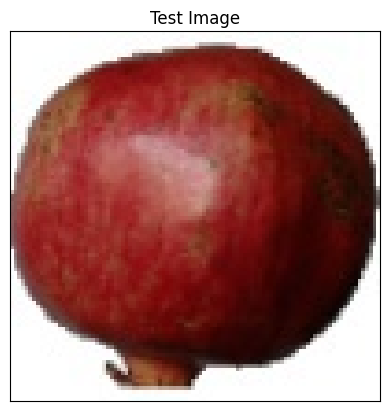

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
5
It's a Pomegranate


In [ ]:
image_path = '/content/drive/MyDrive/Data Set/Validation/Pomegranate/37_100.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()
print(predictions)
result_index = np.argmax(predictions)
print(result_index)
print("It's a {}".format(validation_set.class_names[result_index]))